In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [186]:
# ouverture du fichier cvs
df = pd.read_csv('train.csv')
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


6019 lignes et 13 colonnes

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


- Colonne 'New_Price' a beaucoup de valeurs manquantes

In [188]:
# Vérification des doublons
df.duplicated().sum()

0

- pas de doublons dans les valeurs

In [189]:
# Colonne Name
print('Colonne Name : \n')
print('Doublons : ', df['Name'].duplicated().sum())

print('Name : ', df['Name'].value_counts(), '\n')
df['Name'].sort_values().unique().tolist()



Colonne Name : 

Doublons :  4143
Name :  Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: count, Length: 1876, dtype: int64 



['Ambassador Classic Nova Diesel',
 'Audi A3 35 TDI Attraction',
 'Audi A3 35 TDI Premium',
 'Audi A3 35 TDI Premium Plus',
 'Audi A3 35 TDI Technology',
 'Audi A4 1.8 TFSI',
 'Audi A4 1.8 TFSI Technology Edition',
 'Audi A4 2.0 TDI',
 'Audi A4 2.0 TDI 177 Bhp Premium Plus',
 'Audi A4 2.0 TDI 177 Bhp Technology Edition',
 'Audi A4 2.0 TDI Celebration Edition',
 'Audi A4 2.0 TDI Multitronic',
 'Audi A4 2.0 TDI Premium Sport Limited Edition',
 'Audi A4 2.0 TFSI',
 'Audi A4 3.0 TDI Quattro',
 'Audi A4 3.0 TDI Quattro Premium',
 'Audi A4 3.2 FSI Tiptronic Quattro',
 'Audi A4 30 TFSI Premium Plus',
 'Audi A4 35 TDI Premium',
 'Audi A4 35 TDI Premium Plus',
 'Audi A4 35 TDI Premium Sport',
 'Audi A4 35 TDI Technology',
 'Audi A4 35 TDI Technology Edition',
 'Audi A4 New 2.0 TDI Multitronic',
 'Audi A6 2.0 TDI Design Edition',
 'Audi A6 2.7 TDI',
 'Audi A6 2.8 FSI',
 'Audi A6 2011-2015 2.0 TDI',
 'Audi A6 2011-2015 2.0 TDI Premium Plus',
 'Audi A6 2011-2015 2.0 TDI Technology',
 'Audi A6 2011

In [190]:
# Colonne Year
print('Colonne Year : \n')
print('Doublons : ', df['Year'].duplicated().sum())

print('Années triées par nombre de fois d apparition : ', df['Year'].value_counts(), '\n')


print(df['Year'].min(), df['Year'].max())


Colonne Year : 

Doublons :  5997
Années triées par nombre de fois d apparition :  Year
2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: count, dtype: int64 

1998 2019


- Les années sont comprises entre 1998 et 2019

In [191]:
# Colonne Localisation
print('Colonne Localisation : \n')
print('Doublons : ', df['Location'].duplicated().sum())

print('Type de carburant triés par nombre de fois d apparition : ', df['Location'].value_counts().sort_values(), '\n')

Colonne Localisation : 

Doublons :  6008
Type de carburant triés par nombre de fois d apparition :  Location
Ahmedabad     224
Bangalore     358
Jaipur        413
Chennai       494
Kolkata       535
Delhi         554
Pune          622
Coimbatore    636
Kochi         651
Hyderabad     742
Mumbai        790
Name: count, dtype: int64 



- type catégoriel : a voir les corrélations 

In [192]:
# Colonne Seats
print('Colonne Seats : \n')
print('Doublons : ', df['Seats'].duplicated().sum())

print('Type de carburant triés par nombre de fois d apparition : ', df['Seats'].value_counts().sort_values(), '\n')

Colonne Seats : 

Doublons :  6009
Type de carburant triés par nombre de fois d apparition :  Seats
0.0        1
9.0        3
10.0       5
2.0       16
6.0       31
4.0       99
8.0      134
7.0      674
5.0     5014
Name: count, dtype: int64 



- Il y a une voiture qui n'a aucun siège...

In [193]:
df[df['Seats'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.0


In [194]:
df[df['Name'] == 'Audi A4 3.2 FSI Tiptronic Quattro']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.0


In [195]:
df[(df['Name'].str.contains('Audi A4 3'))]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,NaN,9.80
1044,Audi A4 35 TDI Technology,Hyderabad,2015,45000,Diesel,Automatic,First,18.25 kmpl,1968 CC,187.74 bhp,5.0,55.61 Lakh,25.00
1637,Audi A4 35 TDI Premium,Coimbatore,2016,68193,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,24.74
1900,Audi A4 3.0 TDI Quattro Premium,Coimbatore,2012,46913,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,NaN,16.11
2114,Audi A4 35 TDI Premium,Hyderabad,2015,50000,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,25.00
2484,Audi A4 35 TDI Premium Sport,Chennai,2016,11000,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,28.00
2506,Audi A4 35 TDI Premium,Coimbatore,2016,39644,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,25.75
3158,Audi A4 30 TFSI Premium Plus,Kochi,2017,61221,Petrol,Automatic,First,17.84 kmpl,1395 CC,147.51 bhp,5.0,47.16 Lakh,21.73
3535,Audi A4 35 TDI Premium,Coimbatore,2016,39237,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,25.64
3730,Audi A4 35 TDI Premium,Bangalore,2015,58970,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,23.75


- D'après la recherche on pourrait mettre que c'est une 5 places mais il y a aussi une valeur manquante dans Power, garde-t-on cette ligne ?


In [196]:
# Colonne Type fuel
print('Colonne Fuel_Type : \n')
print('Doublons : ', df['Fuel_Type'].duplicated().sum())

print('Type de carburant triés par nombre de fois d apparition : ', df['Fuel_Type'].value_counts().sort_values(), '\n')

Colonne Fuel_Type : 

Doublons :  6014
Type de carburant triés par nombre de fois d apparition :  Fuel_Type
Electric       2
LPG           10
CNG           56
Petrol      2746
Diesel      3205
Name: count, dtype: int64 



- type catégoriel : 5 types différents de carburants (pour l'application on pourra faire une liste déroulante)

In [197]:
# Colonne Transmission
print('Colonne Transmission : \n')
print('Doublons : ', df['Transmission'].duplicated().sum())

print('Transmission triées par nombre de fois d apparition : ', df['Transmission'].value_counts().sort_values(), '\n')

Colonne Transmission : 

Doublons :  6017
Transmission triées par nombre de fois d apparition :  Transmission
Automatic    1720
Manual       4299
Name: count, dtype: int64 



- type catégoriel : 2 types de transmissions possible

In [198]:
# Colonne Owner_Type
print('Colonne Owner_Type : \n')
print('Doublons : ', df['Owner_Type'].duplicated().sum())

print('Owner_Type triées par nombre de fois d apparition : ', df['Owner_Type'].value_counts().sort_values(), '\n')

Colonne Owner_Type : 

Doublons :  6015
Owner_Type triées par nombre de fois d apparition :  Owner_Type
Fourth & Above       9
Third              113
Second             968
First             4929
Name: count, dtype: int64 



- type catégoriel : 4 catégories possibles

In [199]:
# Colonne Mileage
print('Colonne Mileage : \n')
print('Doublons : ', df['Mileage'].duplicated().sum())

df[['nb_mileage', 'type_mileage']] = df['Mileage'].str.rsplit(' ', n=1, expand=True)
df

Colonne Mileage : 

Doublons :  5576


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,nb_mileage,type_mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.6,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.2,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.2,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,28.4,kmpl
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,24.4,kmpl
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,14.0,kmpl
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,18.9,kmpl


In [203]:
# Séparation colonnes marque et modèle
df[['marque', 'modele']] = df['Name'].str.split(' ', n=1, expand=True)

# Séparation du modèle en 2 parties
df[['debut_modele', 'modele_detail']] = df['modele'].str.split(' ', n=1, expand=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,nb_mileage,type_mileage,marque,modele,debut_modele,modele_detail
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.6,km/kg,Maruti,Wagon R LXI CNG,Wagon,R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,Hyundai,Creta 1.6 CRDi SX Option,Creta,1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.2,kmpl,Honda,Jazz V,Jazz,V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,Maruti,Ertiga VDI,Ertiga,VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.2,kmpl,Audi,A4 New 2.0 TDI Multitronic,A4,New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,28.4,kmpl,Maruti,Swift VDI,Swift,VDI
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,24.4,kmpl,Hyundai,Xcent 1.1 CRDi S,Xcent,1.1 CRDi S
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,14.0,kmpl,Mahindra,Xylo D4 BSIV,Xylo,D4 BSIV
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,18.9,kmpl,Maruti,Wagon R VXI,Wagon,R VXI


In [ ]:
df[['nb_power', 'type_power']] = df['Power'].str.rsplit(' ', n=1, expand=True)
df['type_power'].value_counts()

type_power
bhp    5983
Name: count, dtype: int64

- il n'y a qu'un seul type de puissance donc nous n'avons pas besoin de ces 2 nouvelles colonnes

In [ ]:
df.drop(['nb_power', 'type_power'], axis=1, inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,nb_mileage,type_mileage,marque,modele_complet,type_modele
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.6,km/kg,Wagon,Wagon R LXI CNG,R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,Creta,Creta 1.6 CRDi SX Option,1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.2,kmpl,Jazz,Jazz V,V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,Ertiga,Ertiga VDI,VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.2,kmpl,A4,A4 New 2.0 TDI Multitronic,New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,28.4,kmpl,Swift,Swift VDI,VDI
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,24.4,kmpl,Xcent,Xcent 1.1 CRDi S,1.1 CRDi S
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,14.0,kmpl,Xylo,Xylo D4 BSIV,D4 BSIV
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,18.9,kmpl,Wagon,Wagon R VXI,R VXI


In [ ]:
df[['nb_engine', 'type_engine']] = df['Engine'].str.rsplit(' ', n=1, expand=True)
df['type_engine'].value_counts()

type_engine
CC    5983
Name: count, dtype: int64

- il n'y a qu'un seul type de engine donc nous n'avons pas besoin de ces 2 nouvelles colonnes

In [ ]:
df.drop(['nb_engine', 'type_engine'], axis=1, inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,nb_mileage,type_mileage,marque,modele_complet,type_modele
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.6,km/kg,Wagon,Wagon R LXI CNG,R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,Creta,Creta 1.6 CRDi SX Option,1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.2,kmpl,Jazz,Jazz V,V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,Ertiga,Ertiga VDI,VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.2,kmpl,A4,A4 New 2.0 TDI Multitronic,New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,28.4,kmpl,Swift,Swift VDI,VDI
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,24.4,kmpl,Xcent,Xcent 1.1 CRDi S,1.1 CRDi S
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,14.0,kmpl,Xylo,Xylo D4 BSIV,D4 BSIV
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,18.9,kmpl,Wagon,Wagon R VXI,R VXI


In [ ]:
# Valeurs manquantes dans Engine
df[df['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,nb_mileage,type_mileage,marque,modele_complet,type_modele
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95,0.0,kmpl,City,City 1.5 GXI,1.5 GXI
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,2.11,16.1,kmpl,Swift,Swift 1.3 VXi,1.3 VXi
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,NaN,1.75,16.1,kmpl,Swift,Swift 1.3 VXi,1.3 VXi
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,NaN,26.50,0.0,kmpl,Rover,Rover Range Rover 3.0 D,Range Rover 3.0 D
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,NaN,3.20,12.8,kmpl,City,City 1.3 DX,1.3 DX
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,5.80,16.1,kmpl,Swift,Swift 1.3 ZXI,1.3 ZXI
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,1.50,0.0,kmpl,City,City 1.5 GXI,1.5 GXI
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,40.88,0.0,kmpl,Rover,Rover Range Rover Sport 2005 2012 Sport,Range Rover Sport 2005 2012 Sport
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,3.15,16.1,kmpl,Swift,Swift 1.3 LXI,1.3 LXI
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,1.93,0.0,kmpl,Santro,Santro LP zipPlus,LP zipPlus


- trop de valeurs manquantes dans ces lignes, est-il pertinent de les garder ? 

In [ ]:
df['marque'].str.upper().value_counts().sort_values()

marque
F            1
MUSTANG      1
FUSION       1
SIENA        1
EVALIA       1
          ... 
INNOVA     164
VERNA      170
I20        247
CITY       270
SWIFT      353
Name: count, Length: 211, dtype: int64

In [204]:
df['modele'].str.upper().sort_values().value_counts()

modele
SWIFT DZIRE VDI                    50
XUV500 W8 2WD                      49
SWIFT VDI                          45
CITY 1.5 S MT                      34
SWIFT VDI BSIV                     31
                                   ..
ENDEAVOUR 4X2 XLT                   1
POLO IPL II 1.2 PETROL HIGHLINE     1
ELITE I20 SPORTZ PLUS               1
PRIUS 2009-2016 Z4                  1
CRETA 1.6 VTVT E PLUS               1
Name: count, Length: 1852, dtype: int64

- on réfléchi à l'encodage qui peut être compliqué sur le nombre de modèles différents... à réfléchir si on garde la colonne ou pas

In [209]:
df.groupby('marque')['debut_modele'].value_counts()


marque      debut_modele
Ambassador  Classic          1
Audi        A4              78
            A6              49
            Q7              38
            Q5              30
                            ..
Volvo       S60              7
            XC60             6
            V40              4
            S80              2
            XC90             2
Name: count, Length: 216, dtype: int64

In [ ]:
df.groupby('Fuel_Type')['type_mileage'].value_counts()

Fuel_Type  type_mileage
CNG        km/kg             56
Diesel     kmpl            3205
LPG        km/kg             10
Petrol     kmpl            2746
Name: count, dtype: int64

- le type de mileage dépend du type de carburant, si c'est un carburant gaz = km/kg, si c'est un carburant de type 'essence' alors c'est en kmpl

In [ ]:
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,nb_mileage,type_mileage,marque,modele
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00,NaN,NaN,Mahindra,E Verito D4
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75,NaN,NaN,Toyota,Prius 2009-2016 Z4


- il n'y a que 2 lignes pour l'entrainement sur le type de type_fuel = 'electric' alors nous avons pris la décison de supprimer ces lignes car elles se seront pas assez représentative pour le modèle

In [ ]:
dftest = pd.read_csv('test.csv')
dftest[dftest['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price


- il n'y a pas de lignes de test de véhicule de type electric. Ce qui nous conforte dans notre choix.

In [ ]:
df.drop(['Name', 'New_Price', 'Mileage', 'type_mileage', 'modele'], axis=1, inplace=True)
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,nb_mileage,marque
0,Mumbai,2010,72000,CNG,Manual,First,998 CC,58.16 bhp,5.0,1.75,26.6,Maruti
1,Pune,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,12.50,19.67,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,4.50,18.2,Honda
3,Chennai,2012,87000,Diesel,Manual,First,1248 CC,88.76 bhp,7.0,6.00,20.77,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,17.74,15.2,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,1248 CC,74 bhp,5.0,4.75,28.4,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,1120 CC,71 bhp,5.0,4.00,24.4,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,2498 CC,112 bhp,8.0,2.90,14.0,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,998 CC,67.1 bhp,5.0,2.65,18.9,Maruti


- On supprime les colonnes qui ne nous servent plus

- OrdinalEncoder !

In [ ]:
df['Engine'] = df['Engine'].str.replace("CC", "")
df['Power'] = df['Power'].str.replace("bhp", "")
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,nb_mileage,marque
0,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5.0,1.75,26.6,Maruti
1,Pune,2015,41000,Diesel,Manual,First,1582,126.2,5.0,12.50,19.67,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,1199,88.7,5.0,4.50,18.2,Honda
3,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7.0,6.00,20.77,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.8,5.0,17.74,15.2,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,1248,74,5.0,4.75,28.4,Maruti
6015,Jaipur,2015,100000,Diesel,Manual,First,1120,71,5.0,4.00,24.4,Hyundai
6016,Jaipur,2012,55000,Diesel,Manual,Second,2498,112,8.0,2.90,14.0,Mahindra
6017,Kolkata,2013,46000,Petrol,Manual,First,998,67.1,5.0,2.65,18.9,Maruti


- on a supprimé le texte des colonnes Engine et Power pour ne garder que les données numériques

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Engine             5983 non-null   object 
 7   Power              5983 non-null   object 
 8   Seats              5977 non-null   float64
 9   Price              6019 non-null   float64
 10  nb_mileage         6017 non-null   object 
 11  marque             6019 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [ ]:
# Convertir Engine, Power, et nb_mileage en numérique
df["Engine"] = pd.to_numeric(df['Engine'], errors='coerce')
df["Power"] = pd.to_numeric(df['Power'], errors='coerce')
df["nb_mileage"] = pd.to_numeric(df['nb_mileage'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Engine             5983 non-null   float64
 7   Power              5876 non-null   float64
 8   Seats              5977 non-null   float64
 9   Price              6019 non-null   float64
 10  nb_mileage         6017 non-null   float64
 11  marque             6019 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


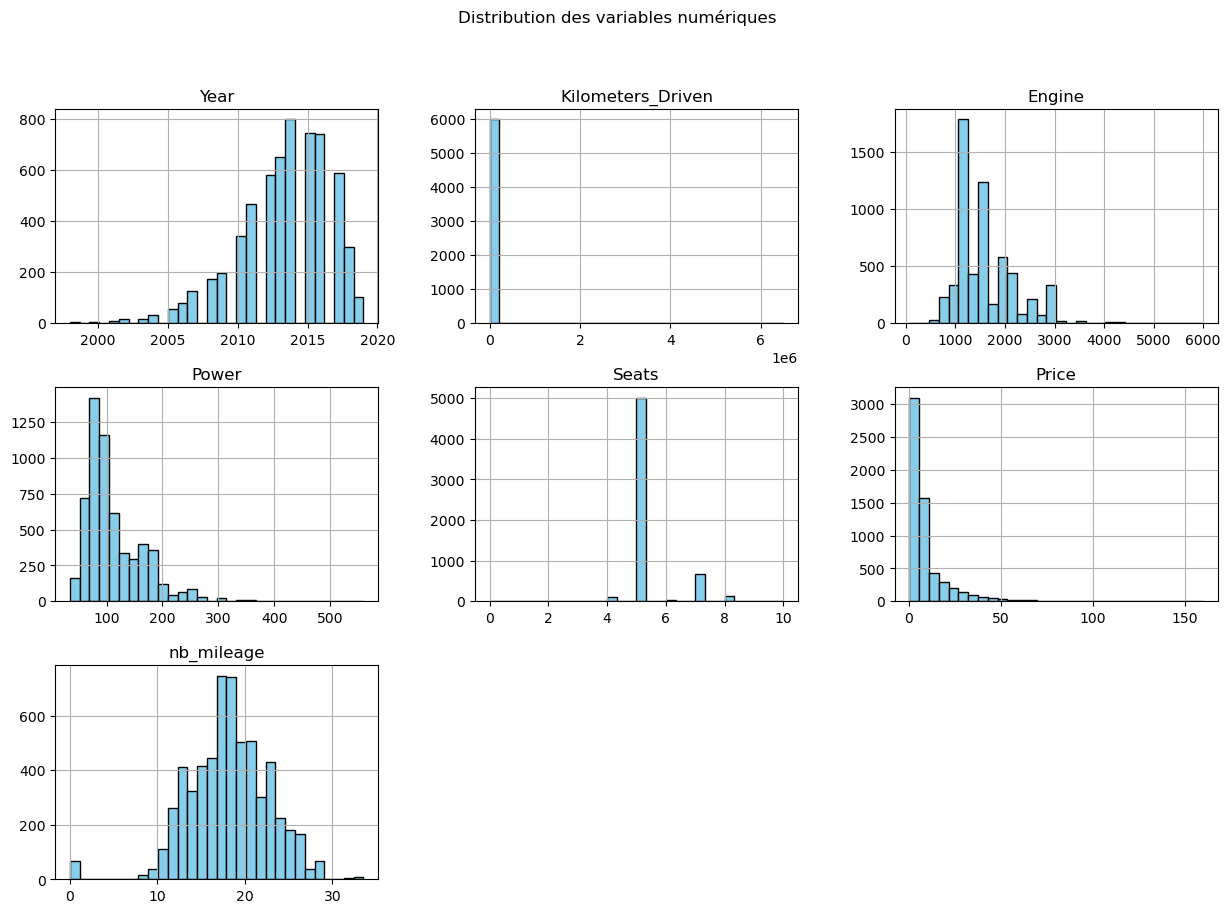

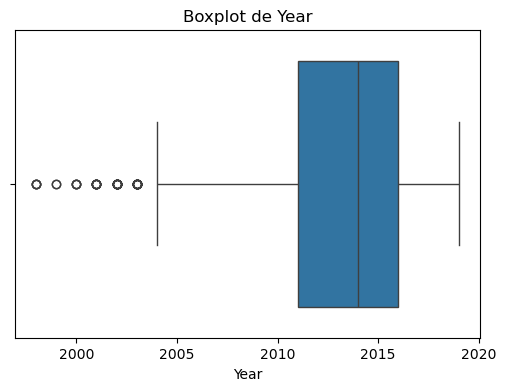

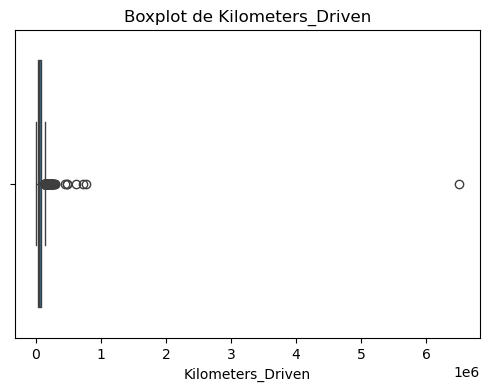

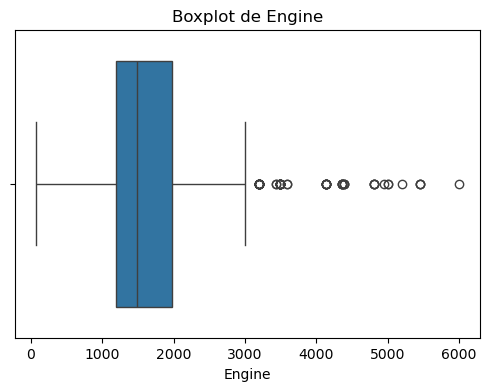

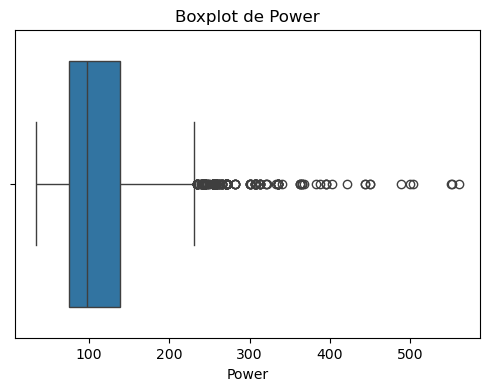

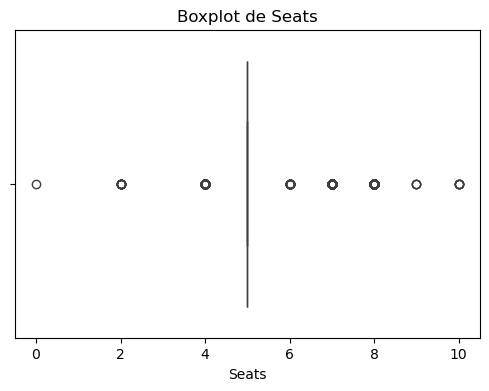

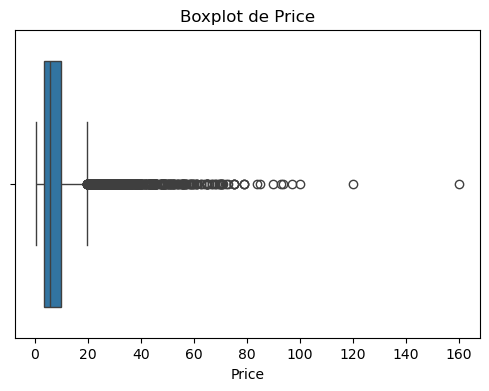

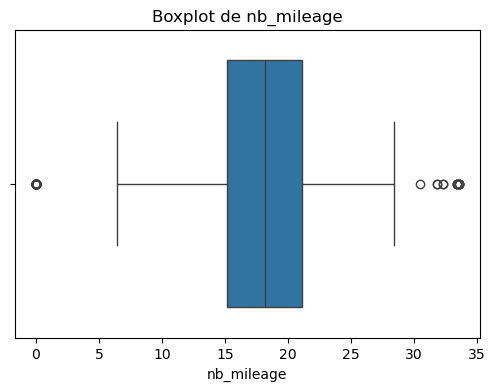

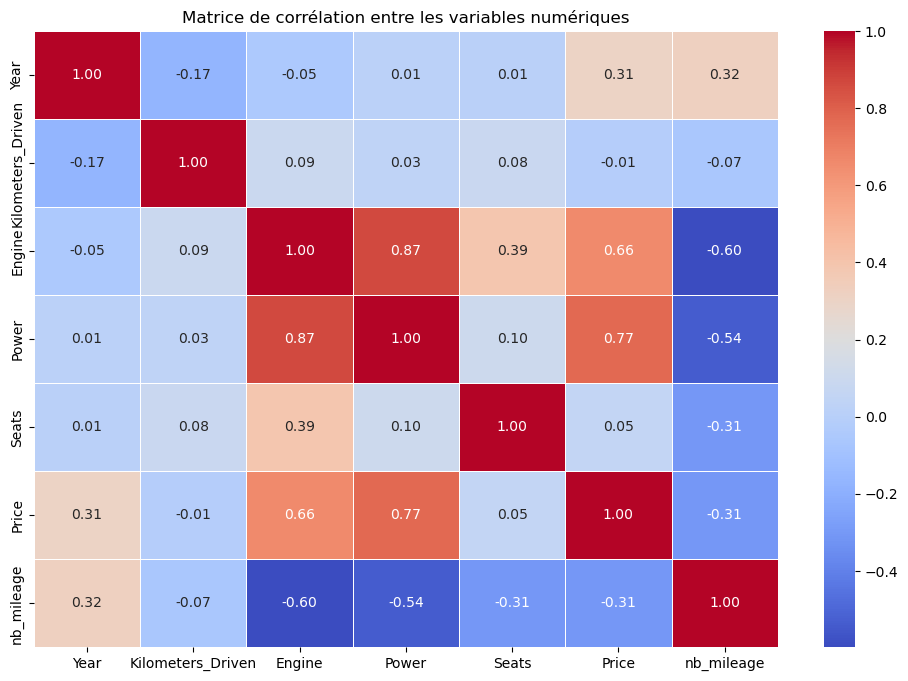

In [ ]:
#Distribution des variables numériques
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

#Histogrammes
df[numeric_features].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution des variables numériques')
plt.show()

#Boxplots pour vérifier les valeurs aberrantes
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
    plt.show()

#Analyse des corrélations
corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()